#  When is it most profitable to release movies?

## Import all of the relevant data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Assigning the movie gross table to variable
df_movie_gross = pd.read_csv('dataframe_id_bom_movie_gross_gz.csv')
# importing budget csv 
df_budget = pd.read_csv('dataframe_id_tn_movie_budgets_gz.csv')

## Cleaning

In [3]:
df_movie_gross.head() #checking the layout and stats


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


###  Movie_Gross

In [4]:
# testing dropping 'studio' column due to irrelevance to any of 
test_drop = df_movie_gross.drop(axis=1, columns='studio', inplace=False)
#checking colunns
test_drop.columns

Index(['title', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [5]:
# dropping 'studio'
df_movie_gross.drop(axis=1, columns='studio', inplace=True)

In [6]:
#finding NaNs
print(df_movie_gross.isna())
print(df_movie_gross.isna().sum())

      title  domestic_gross  foreign_gross   year
0     False           False          False  False
1     False           False          False  False
2     False           False          False  False
3     False           False          False  False
4     False           False          False  False
...     ...             ...            ...    ...
3382  False           False           True  False
3383  False           False           True  False
3384  False           False           True  False
3385  False           False           True  False
3386  False           False           True  False

[3387 rows x 4 columns]
title                0
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


In [7]:
# missing 5 values for sutdio [dropping column anyway] 
#domestic_gross is missing 28 values might just drop those rows
#foreign_gross missing 1350 values; calculating the percentage of data missing
(df_movie_gross['foreign_gross'].isna()
                 .sum()/len(df_movie_gross['foreign_gross'])) * 100

39.85828166519043

In [8]:
# 39.85% of our foreign gross values is missing, replacing with median values
# checking for why NaN's present (did these movies not get foreign/domestic 
# releases?)
is_NaN = df_movie_gross.isnull()  #This method allows me to see the rows that
                                    # have NaN values so I can compare columns
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df_movie_gross[row_has_NaN]

print(rows_with_NaN)

                                       title  domestic_gross foreign_gross  \
222                                  Flipped       1800000.0           NaN   
230               It's a Wonderful Afterlife             NaN       1300000   
254   The Polar Express (IMAX re-issue 2010)        673000.0           NaN   
267                           Tiny Furniture        392000.0           NaN   
269            Grease (Sing-a-Long re-issue)        366000.0           NaN   
...                                      ...             ...           ...   
3382                               The Quake          6200.0           NaN   
3383             Edward II (2018 re-release)          4800.0           NaN   
3384                                El Pacto          2500.0           NaN   
3385                                The Swan          2400.0           NaN   
3386                       An Actor Prepares          1700.0           NaN   

      year  
222   2010  
230   2010  
254   2010  
267   2010 

In [9]:
# Assuming that NaN's represent lack of releases in those markets, replacing 
# NaN's with 0's

df_movie_gross['domestic_gross'].fillna(0, inplace=True)

# Checking results
print(df_movie_gross.isna().sum())

title                0
domestic_gross       0
foreign_gross     1350
year                 0
dtype: int64


In [10]:
# Re-checking datatypes
df_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 4 columns):
title             3387 non-null object
domestic_gross    3387 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 106.0+ KB


In [11]:
# Need to change foreign_gross to float
# Function takes dataframe and column name as arguments. It then searches down
# every row in the given dataframe column and if it finds '$', commas, or 
# apostrophes, the function replaces them with empty space, deleting them.
# It then changes the datatype of the object from string to float.
# Finally, it returns the modified dataframe column.
def convert_amt_to_float(df, col):
    """
    Function takes dataframe and column name as arguments. 
    It then searches down
    every row in the given dataframe column and if it finds '$', commas, or 
    apostrophes, the function replaces them with empty space, deleting them.
    It then changes the datatype of the object from string to float.
    Finally, it returns the modified dataframe column.
    """
    
    df[col] = df[col].str.replace("$", "").str.replace(",", "").str.replace(
        "'","").astype('float')
    return df

df_movie_gross['foreign_gross'] = convert_amt_to_float(df_movie_gross, 
                                                     'foreign_gross')


In [12]:
# Checking
df_movie_gross['foreign_gross']

0                                       Toy Story 3
1                        Alice in Wonderland (2010)
2       Harry Potter and the Deathly Hallows Part 1
3                                         Inception
4                               Shrek Forever After
                           ...                     
3382                                      The Quake
3383                    Edward II (2018 re-release)
3384                                       El Pacto
3385                                       The Swan
3386                              An Actor Prepares
Name: foreign_gross, Length: 3387, dtype: object

In [13]:
# Still NaNs in foreign_gross, turning into 0's
df_movie_gross['foreign_gross'].fillna(0, inplace=True)

df_movie_gross['foreign_gross']

0                                       Toy Story 3
1                        Alice in Wonderland (2010)
2       Harry Potter and the Deathly Hallows Part 1
3                                         Inception
4                               Shrek Forever After
                           ...                     
3382                                      The Quake
3383                    Edward II (2018 re-release)
3384                                       El Pacto
3385                                       The Swan
3386                              An Actor Prepares
Name: foreign_gross, Length: 3387, dtype: object

In [14]:
# Checking dataframe
df_movie_gross.head(1)

,title,domestic_gross,foreign_gross,year
0,Toy Story 3,415000000.0,Toy Story 3,2010


In [15]:
# Checking for duplicates
print(df_movie_gross.duplicated())
df_movie_gross.shape

0       False
1       False
2       False
3       False
4       False
        ...  
3382    False
3383    False
3384    False
3385    False
3386    False
Length: 3387, dtype: bool


(3387, 4)

In [16]:
# No duplicates!
# Exporting to csv for teammates to use
df_movie_gross.to_csv('bom_movie_gross_clean.csv')

### Cleaning Budgets
Now that movie_gross is clean, it's time to move onto budgets

In [17]:
# Checking layout
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [18]:
# Checking datatypes
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [19]:
# Need to drop 'id' and change all numericaL columns to floats or ints
df_budget.drop(axis=1, columns=['id'], inplace=True)
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 5 columns):
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: object(5)
memory usage: 226.0+ KB


In [20]:
#checking for missing values
df_budget.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [21]:
# Need to change numeric values to floats
# Function takes dataframe and column name as arguments. It then searches down
# Calling function we used earlier
# Try with one
convert_amt_to_float(df_budget, 'production_budget')

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625","$2,776,345,279"
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875","$1,045,663,875"
2,"Jun 7, 2019",Dark Phoenix,350000000.0,"$42,762,350","$149,762,350"
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868","$1,403,013,963"
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,"$620,181,382","$1,316,721,747"
...,...,...,...,...,...
5777,"Dec 31, 2018",Red 11,7000.0,$0,$0
5778,"Apr 2, 1999",Following,6000.0,"$48,482","$240,495"
5779,"Jul 13, 2005",Return to the Land of Wonders,5000.0,"$1,338","$1,338"
5780,"Sep 29, 2015",A Plague So Pleasant,1400.0,$0,$0


In [22]:
# Making list of remaining columns to iterate function through

num_cols = ['domestic_gross', 'worldwide_gross']

# For loop will iterate our function only through the columns of our dataframe
# that are specified in our list.

for col in num_cols:
    df_budget = convert_amt_to_float(df_budget, col)

In [23]:
# Checking
print(df_budget.info())
df_budget.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 5 columns):
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null float64
domestic_gross       5782 non-null float64
worldwide_gross      5782 non-null float64
dtypes: float64(3), object(2)
memory usage: 226.0+ KB
None


,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [24]:
# Checking
print(df_budget.info())
df_budget.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 5 columns):
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null float64
domestic_gross       5782 non-null float64
worldwide_gross      5782 non-null float64
dtypes: float64(3), object(2)
memory usage: 226.0+ KB
None


,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


### Preparing for Merge
Since we plan on merging these tables, we're going to change the names of columns and change release_date into separate columns

In [25]:
# Changing name of 'movie' to 'title' so it matches df_movie_gross
df_budget = df_budget.rename(columns={'movie' : 'title'})
# checking
print(df_budget.columns)
df_movie_gross.columns

Index(['release_date', 'title', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')


Index(['title', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [26]:
# Even though we did all of that work on foreign gross, we don't 
# want it to decrease our sample size or create NaNs after the merge.
# Best to just drop it
df_movie_gross = df_movie_gross.drop('foreign_gross', axis=1)
df_movie_gross.head()

,title,domestic_gross,year
0,Toy Story 3,415000000.0,2010
1,Alice in Wonderland (2010),334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,2010
3,Inception,292600000.0,2010
4,Shrek Forever After,238700000.0,2010


In [27]:
# Using .split to create a new df with 3 columns of containing 
#each part of the string that's separated by '', respectively.  
release_split = df_budget.release_date.str.split(" ",expand=True)
release_split

,0,1,2
0,Dec,"18,",2009
1,May,"20,",2011
2,Jun,"7,",2019
3,May,"1,",2015
4,Dec,"15,",2017
...,...,...,...
5777,Dec,"31,",2018
5778,Apr,"2,",1999
5779,Jul,"13,",2005
5780,Sep,"29,",2015


In [28]:
# Merging both tables into a new one
budgets = pd.concat([release_split, df_budget], axis=1)
budgets.head()

,0,1,2,release_date,title,production_budget,domestic_gross,worldwide_gross
0,Dec,"18,",2009,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,May,"20,",2011,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,Jun,"7,",2019,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,May,"1,",2015,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,Dec,"15,",2017,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [29]:
# Renaming columns
budgets = budgets.rename(columns={ 0 : 'month', 1: 'day', 2: 'year'})
budgets.head()

,month,day,year,release_date,title,production_budget,domestic_gross,worldwide_gross
0,Dec,"18,",2009,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,May,"20,",2011,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,Jun,"7,",2019,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,May,"1,",2015,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,Dec,"15,",2017,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [30]:
# Changing month names to numbers to make plotting easier
monthdict = { 'Jan' : 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, "May": 5, "Jun": 6,
         'Jul' : 7, 'Aug' : 8, 'Sep' : 9, 'Oct' : 10, 'Nov' : 11, 'Dec' : 12}
                           
budgets = budgets.replace({'month': monthdict})
budgets.head()

,month,day,year,release_date,title,production_budget,domestic_gross,worldwide_gross
0,12,"18,",2009,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,5,"20,",2011,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,6,"7,",2019,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,5,"1,",2015,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,12,"15,",2017,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [31]:
# Don't need 'day' and 'release_date' column
budgets = budgets.drop(['day', 'release_date'], axis=1)
budgets.columns

Index(['month', 'year', 'title', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [32]:
# Checking for duplicates
print(budgets.shape)
budgets.duplicated().any()

(5782, 6)


False

In [33]:
# No duplicates!
# Exporting table to csv for teamates to use
budgets.to_csv('tn_movie_budgets_clean.csv')

### Merging the Tables

In [34]:
# Merging budgets with movie_gross
# We want our merge the tables so that we add the titles together, thus
# increasing our sample size.  We also only want as many titles as we can get!
profit = budgets.set_index('title').join(df_movie_gross.set_index('title'),
                                         rsuffix='_gr',
                                                how='left')
print(profit.shape)
profit.head()

(5782, 7)


,month,year,production_budget,domestic_gross,worldwide_gross,domestic_gross_gr,year_gr
title,,,,,,,
#Horror,11,2015,1500000.0,0.0,0.0,NaN,NaN
(500) Days of Summer,7,2009,7500000.0,32425665.0,34439060.0,NaN,NaN
10 Cloverfield Lane,3,2016,5000000.0,72082999.0,108286422.0,72100000.0,2016.0
10 Days in a Madhouse,11,2015,12000000.0,14616.0,14616.0,NaN,NaN
10 Things I Hate About You,3,1999,13000000.0,38177966.0,60413950.0,NaN,NaN


In [35]:
# We already have a 'year' column and there is conflicting data in our 
# respective domestic_gross columns.  We should also reset the index.
profit = profit.reset_index()

In [36]:
profit = profit.drop('year_gr', axis=1)
profit.columns

Index(['title', 'month', 'year', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'domestic_gross_gr'],
      dtype='object')

In [37]:
# To deal with the inconsistency between the domestic gross columns, we're
# going to redefine the original domestic_gross so that is the average 
# between both columns
profit['dom_gross'] = (profit['domestic_gross'] + 
                       profit['domestic_gross_gr'])/2
profit.head()

,title,month,year,production_budget,domestic_gross,worldwide_gross,domestic_gross_gr,dom_gross
0,#Horror,11,2015,1500000.0,0.0,0.0,NaN,NaN
1,(500) Days of Summer,7,2009,7500000.0,32425665.0,34439060.0,NaN,NaN
2,10 Cloverfield Lane,3,2016,5000000.0,72082999.0,108286422.0,72100000.0,72091499.5
3,10 Days in a Madhouse,11,2015,12000000.0,14616.0,14616.0,NaN,NaN
4,10 Things I Hate About You,3,1999,13000000.0,38177966.0,60413950.0,NaN,NaN


In [38]:
# Dropping old columns, and also dropping foreign_gross since 
# we don't need it 
profit = profit.drop(['domestic_gross','domestic_gross_gr'], axis=1)
profit.columns

Index(['title', 'month', 'year', 'production_budget', 'worldwide_gross',
       'dom_gross'],
      dtype='object')

In [39]:
#changing name of dom_gross
profit = profit.rename(columns={'dom_gross' : 'domestic_gross'})

In [40]:
# checking for NaNs caused from merge
profit.isna().sum()

title                   0
month                   0
year                    0
production_budget       0
worldwide_gross         0
domestic_gross       4535
dtype: int64

In [41]:
# No NaNs! Checking for duplicates.
profit.duplicated().any()

False

In [42]:
# Now we're going to create a column that shows 
# the net profit of each movie
profit['net_prof'] = profit['worldwide_gross'] - profit['production_budget']
profit.head()

,title,month,year,production_budget,worldwide_gross,domestic_gross,net_prof
0,#Horror,11,2015,1500000.0,0.0,NaN,-1500000.0
1,(500) Days of Summer,7,2009,7500000.0,34439060.0,NaN,26939060.0
2,10 Cloverfield Lane,3,2016,5000000.0,108286422.0,72091499.5,103286422.0
3,10 Days in a Madhouse,11,2015,12000000.0,14616.0,NaN,-11985384.0
4,10 Things I Hate About You,3,1999,13000000.0,60413950.0,NaN,47413950.0


In [43]:
# To account for inflation, we're going to go ahead and make a column that 
# shows the net profit margin as a percentage
profit['net_margin_%'] = round((profit['net_prof']/profit['worldwide_gross']
                               )*100, 2)
profit.head()

,title,month,year,production_budget,worldwide_gross,domestic_gross,net_prof,net_margin_%
0,#Horror,11,2015,1500000.0,0.0,NaN,-1500000.0,-inf
1,(500) Days of Summer,7,2009,7500000.0,34439060.0,NaN,26939060.0,78.22
2,10 Cloverfield Lane,3,2016,5000000.0,108286422.0,72091499.5,103286422.0,95.38
3,10 Days in a Madhouse,11,2015,12000000.0,14616.0,NaN,-11985384.0,-82001.81
4,10 Things I Hate About You,3,1999,13000000.0,60413950.0,NaN,47413950.0,78.48


In [44]:
# Since we want to focus on profits, lets limit our data set to 
# profit >= 0
profit = profit[profit['net_prof'] >= 0]

In [45]:
# Creating csv for teammates to use
profit.to_csv('joined_gross_budget_cleaned.csv')

## Filtering Relevant Data
Now that our table is merged and our data is cleaned, let's start answering our question!

In [46]:
# set table to variable
df = profit

In [47]:
df.head() #checking the layout

,title,month,year,production_budget,worldwide_gross,domestic_gross,net_prof,net_margin_%
1,(500) Days of Summer,7,2009,7500000.0,34439060.0,NaN,26939060.0,78.22
2,10 Cloverfield Lane,3,2016,5000000.0,108286422.0,72091499.5,103286422.0,95.38
4,10 Things I Hate About You,3,1999,13000000.0,60413950.0,NaN,47413950.0,78.48
5,"10,000 B.C.",3,2008,105000000.0,269065678.0,NaN,164065678.0,60.98
10,12 Monkeys,12,1995,29000000.0,168841459.0,NaN,139841459.0,82.82


In [48]:
# checking for datatypes in table
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3657 entries, 1 to 5781
Data columns (total 8 columns):
title                3657 non-null object
month                3657 non-null int64
year                 3657 non-null object
production_budget    3657 non-null float64
worldwide_gross      3657 non-null float64
domestic_gross       980 non-null float64
net_prof             3657 non-null float64
net_margin_%         3657 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 257.1+ KB


## Tidying up
Everything looks great, but the column 'month' is a float.  While that isn't 
too much of a problem, I intend to use this column as my x-axis in my plots.  
From a style point of view, I don't want decimals there, so I will be changing that to an integer format.

In [49]:
# Change 'month' from float to int
df['month'] = df['month'].astype(int)
df['month'].dtype

dtype('int32')

In [50]:
# Changing 'year' from string to int
df['year'] = df['year'].astype(int)
df['year'].dtype

dtype('int32')

Since our question is specific to the time of the year to release movies, we are going to sort our values by 'month'.

In [51]:
# Change order to month
df = df.sort_values(by='month')
df.head()

,title,month,year,production_budget,worldwide_gross,domestic_gross,net_prof,net_margin_%
1564,Fish Tank,1,2010,3000000.0,5922292.0,374837.5,2922292.0,49.34
519,Battle for the Planet of the Apes,1,1973,1800000.0,8800000.0,NaN,7000000.0,79.55
4306,The Boy Next Door,1,2015,4000000.0,53401938.0,35703032.5,49401938.0,92.51
4308,The Boys from Brazil,1,1978,12000000.0,19000000.0,NaN,7000000.0,36.84
4332,The Butterfly Effect,1,2004,13000000.0,95638592.0,NaN,82638592.0,86.41


### Subsetting our data

Even though we are looking for a relationship between net profitability and the time of the year a movie is released, we're going to bring in 'production_budget' and 'net_margin%' just in case we need them later. 

In [52]:
# separating the relevent values for profit margin
margin = df[['month','production_budget', 'net_margin_%', 'net_prof']]
margin.head()

,month,production_budget,net_margin_%,net_prof
1564,1,3000000.0,49.34,2922292.0
519,1,1800000.0,79.55,7000000.0
4306,1,4000000.0,92.51,49401938.0
4308,1,12000000.0,36.84,7000000.0
4332,1,13000000.0,86.41,82638592.0


## Initial Plot
Let's plot it out so we see what our initial findings are.

[Text(0, 0.5, 'Net Profit in Millions'),
 Text(0.5, 0, 'Month'),
 Text(0.5, 1.0, 'Seasonal Profitability')]

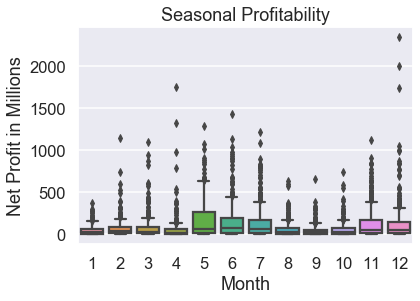

In [53]:
sns.set_style('darkgrid')
sns.set_context('talk')

# net profit plot
# using a lambda function to lower make our y-axis measured in millions 

sns.boxplot(x=margin['month'], y=margin['net_prof'].map(
    lambda x: x/1000000)).set(xlabel='Month', ylabel='Net Profit in Millions',
                                            title='Seasonal Profitability')

### Adjusting Our Plot
Time to filter out some outliers

In [54]:
#checking max of margin and max profit to determine y ranges
print(margin['net_margin_%'].max())
print(margin['net_prof'].max())


99.94
2351345279.0


In [55]:
# Eliminating outliers from 'net_prof'
limit_prof = margin[margin['net_prof'] < 500000000] 

[Text(0, 0.5, 'Net Profit in Millions'),
 Text(0.5, 0, 'Month'),
 Text(0.5, 1.0, 'Seasonal Profitability')]

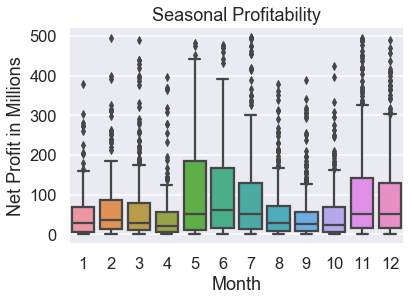

In [56]:
sns.set_style('darkgrid')
sns.set_context('talk')

# re-plotting 
sns.boxplot(x=limit_prof['month'], y=limit_prof['net_prof'].map(
                lambda x: x/1000000)).set(xlabel='Month', 
                                        ylabel='Net Profit in Millions',
                                            title='Seasonal Profitability')

## Conclusions:
While there are still plenty of outliers we can see that the month of May has the greatest potential earnings, with June having a higher median profit.

## Recommendations:
You're definitely going to want to jump in on the summer blockbusters to maximize your profits.  Any release after July would be an unwise move.

# How has budget increased over the years?

Let's take a look at our original dataframe.

In [57]:
df.head()

,title,month,year,production_budget,worldwide_gross,domestic_gross,net_prof,net_margin_%
1564,Fish Tank,1,2010,3000000.0,5922292.0,374837.5,2922292.0,49.34
519,Battle for the Planet of the Apes,1,1973,1800000.0,8800000.0,NaN,7000000.0,79.55
4306,The Boy Next Door,1,2015,4000000.0,53401938.0,35703032.5,49401938.0,92.51
4308,The Boys from Brazil,1,1978,12000000.0,19000000.0,NaN,7000000.0,36.84
4332,The Butterfly Effect,1,2004,13000000.0,95638592.0,NaN,82638592.0,86.41


## Tidying up
How many decades are covered in our sample size?

In [58]:
df['year'].value_counts()

2006    175
2010    170
2008    162
2011    161
2012    151
       ... 
1935      1
1937      1
1947      1
1955      1
1916      1
Name: year, Length: 92, dtype: int64

Our samples go back over 100 years!  Since we don't want to account for inflation and changes in cultural entertainment, we'll only include the last 30 years.

In [59]:
#filtering out dates prior to 1990
budget_years = df[df['year'] >= 1990]
budget_years.shape

(3207, 8)

## Plotting

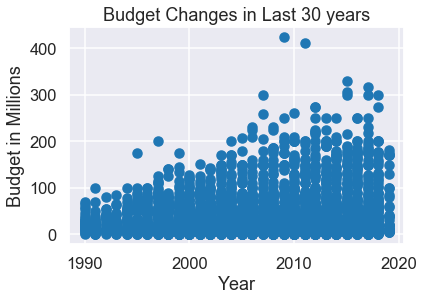

In [60]:
# plotting graph
plt.scatter(budget_years['year'], budget_years['production_budget'].map(
            lambda x: x/1000000), label=
            'Change over the years')
#adding labels
plt.xlabel('Year'), plt.ylabel('Budget in Millions')
plt.title('Budget Changes in Last 30 years')

plt.show()

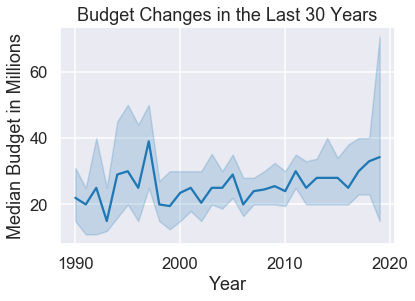

In [61]:
# creating plot and converting y-axis to be values of millions 
# Because our sample size is over 3,000, we're going to use the estimator 
# parameter to make sure that the plot function to bring back 
# median budget.
sns.set_style('darkgrid')
sns.set_context('talk')
ax = sns.lineplot(x=budget_years['year'], y=budget_years[
    'production_budget'].map(lambda x: x/1000000), data = budget_years, 
                  estimator=np.median).set(
                        xlabel='Year', ylabel='Median Budget in Millions',
                        title='Budget Changes in the Last 30 Years')
                 

## Conclusions:
We see that there was a drop in the early 90's, followed by a large spike, most likely as a result of the strong economy and the cost of practical effects.  The sudden drop in budget could probably be attributed to the decrease in practical effects and increase in use of computer generated graphics (the era of The Matrix was just on the horizon). Despite all of this, we can still see a steady increase in the median production budget over the last 30 years.
The cost of spectacle!

## Recommendations:
These budgets seem to coincide with a few variables, the strongest variable being that of the economy. As you venture into the film industry, keep in mind that the cost of making movies will steadily increase and so will your chances of diminishing returns.

# What is the Highest Grossing Genre?

## Import all of the relevant data

In [62]:
df_movies = pd.read_csv('dataframe_id_tmdb_movies_gz.csv')

FileNotFoundError: [Errno 2] File b'dataframe_id_tmdb_movies_gz.csv' does not exist: b'dataframe_id_tmdb_movies_gz.csv'

In [ ]:
df_movies.head()
#print(df_movies.info())
#print(df_movies.shape)

## Cleaning
Our objective in cleaning this table will be to (1). Break 'genre_ids' up into individual columns, (2). convert them from strings to integers, and (3). match the id's with the genre names

### Testing methods of iteration to make our changes

In [ ]:
df_movies['genre_ids'][0] #need to clean this up 
#.apply to run a function on 
# all rows of a dataframe 
#convert genre ids to a list of numbers
# then convert numbers into list of genres

In [ ]:
#turn string into a list #will slice this to remove the brackets, start at 
#index 1 and stopping at -1 takes away first and last characters
'[12, 14, 10751]'[1:-1].split(', ')

In [ ]:
#want to remove commas and spaces. just want list of numbers, 
#not string elements #added .split to end of line once
#we have ints then function to map to genre name
#list comprehension to turn to int
[int(i) for i in ['12', '14', '10751']] #named this list_of_strings

### Applying the Functions
Good! We have a method for dealing with a list of strings and turning it into a list of integers, we'll use this later after we define the function that we'll use. 

In [ ]:
#define function to do all above steps in df to apply to every row def 
# function(row):
#def genre_ids(row):
    #list_of_strings = row['genre_ids'][1:-1].split(', ')
    #return [int(i) for i in list_of_strings]
#this function is what caused the error below

In [ ]:
#apply here
#reassign all values in column to the correct format 
#this is how we change values in df 

In [ ]:
#now we have to account for row 517 and put that in function by an if in list
# comprehension
# This function takes a row as an argument and creates a list of strings 
# using values from that row's ['genre_ids'] column, splits the string at 
# every instance of ', ' and returns that list with each element in integer
# form
    
#Needs to be applied to dataframe via .apply() as follows:
#df = df.apply(lambda x: genre_ids(x), axis=1)
    

def genre_ids(row):
    """
    This function takes a row as an argument and creates a list of strings 
    using values from that row's ['genre_ids'] column, splits the string at 
    every instance of ', ' and returns that list with each element in integer
    form
    
    Needs to be applied to dataframe via .apply() as follows:
    df = df.apply(lambda x: genre_ids(x), axis=1)
    
    """
    list_of_strings = row['genre_ids'][1:-1].split(', ')
    return [int(i) if i != "" else None for i in list_of_strings]

In [ ]:
#applying function to columns

df_movies['genre_ids'] = df_movies.apply(lambda row: genre_ids(row), axis=1)

In [ ]:
# Checking 
df_movies['genre_ids'].head()

In [ ]:
df_movies['genre_ids'] #calling this column

In [ ]:
# Checking type
type(df_movies['genre_ids'][0])

In [ ]:
#create a function to map (json thing) and then do .apply
genremap = [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, 
            {"id": 16, "name": "Animation"}, {"id": 35, "name": "Comedy"}, 
            {"id": 80, "name": "Crime"}, {"id": 99, "name": "Documentary"}, 
            {"id": 18, "name": "Drama"}, {"id": 10751, "name": "Family"}, 
            {"id": 14, "name": "Fantasy"}, {"id": 36, "name": "History"}, 
            {"id": 27, "name": "Horror"}, {"id": 10402, "name": "Music"}, 
            {"id": 9648, "name": "Mystery"}, {"id": 10749, "name": "Romance"}, 
            {"id": 878, "name": "Science Fiction"}, 
            {"id": 10770, "name": "TV Movie"}, {"id": 53, "name": "Thriller"}, 
            {"id": 10752, "name": "War"}, {"id": 37, "name": "Western"}]

In [ ]:
# This function takes a row as an argument and creates a list of integers 
# using row['genre_ids']. Then takes this list and creates another list by 
# iterating through ints and a previously defined dictionary called 'genremap'
# and filters out the list for the relevant genre names. It then returns a 
# list of genre names for every respective genre id number 
def genre_names(row):
    """
     This function takes a row as an argument and creates a list of integers 
     using row['genre_ids']. Then takes this list and creates another list by 
     iterating through ints and a previously defined dictionary called 
     'genremap'
     and filters out the list for the relevant genre names. It then returns a 
     list of genre names for every respective genre id number.
    """
    
    ints = row['genre_ids'] # getting the list of integers
    genre_dicts = list(filter(lambda x: x['id'] in ints, genremap)) 
    # filtering out that list for the relevant genres
    return [g['name'] for g in genre_dicts] # cleaning out

In [ ]:
# create a new column which will contain all of the genre names
df_movies['genre_names'] = df_movies.apply(lambda row : genre_names(row),
                                              axis=1)

In [ ]:
# Checking changes
df_movies

### Separating into Columns
Now that we have our genre names, we're going to want them to have their own columns so we can tally them up and later compare their gross values. 

In [ ]:
# Start by making a list of genre names that we'll turn into columns for 
# a new dataframe
unique_genres = [x['name'] for x in genremap]
unique_genres

In [ ]:
# Creating a new dataframe using genre names as columns 
genre_df = pd.DataFrame(columns=unique_genres)
# redefing new dataframe as a concatenation of df_movies and genre_df
genre_df = pd.concat([df_movies, genre_df])
genre_df.head()

In [ ]:
# To get rid of our NaN values, we are going to use a function that populates
# each genre column with a 1 if it is present in that row's respective column
# 'genre_names'

def populate_genres(genre, row):
    """
    Function takes a genre and a row as arguments and takes that row's column
    'genre_names' and makes a list out of it. If a specific genre name appears
    in that list, the function will add a '1' in that genre's respective column.
    Else, it returns a '0'
    """
    
    genres = row['genre_names']
    if genre in genres:
        return 1
    else:
        return 0

In [ ]:
# testing function on 'Action'
df_movies['Action'] = df_movies.apply(lambda row: populate_genres('Action',
                                                                  row), 
                                      axis = 1)
df_movies['Action']

It worked! Now lets apply it to the whole dataframe!

In [ ]:
# For every genre name in the list unique_genres, this loop will apply the 
# populate_genres function and give a 1 or 0 to the respective genre columns
# in df_movies
for g in unique_genres:
    df_movies[g] = df_movies.apply(lambda row: populate_genres(g, row), 
                                   axis=1)

In [ ]:
df_movies.head()

## Merging with Financial Data
Fantastic! Now we'll bring in the financial data and join the tables

In [ ]:
# Making a new df with only movie titles and genre names
genres = df_movies[['title', 'Action', 'Adventure', 'Animation',
                    'Comedy', 'Crime', 'Documentary', 'Drama',
                    'Family', 'Fantasy', 'History', 'Horror', 'Music',
                    'Mystery', 'Romance', 'Science Fiction', 'TV Movie',
                    'Thriller', 'War', 'Western']]

In [ ]:
genres.shape

In [ ]:
# importing the csv with all of the financial data
profit = pd.read_csv('joined_gross_budget_cleaned.csv')

In [ ]:
# Joining the tables so that the genre columns will match up with the matching
# movie titles in both tables
gross_genre = profit.set_index('title').join(genres.set_index('title'), 
                                             how= 'inner')
gross_genre.head()


In [ ]:
# Dropping 'Unnamed Column'
gross_genre = gross_genre.drop('Unnamed: 0', axis=1)
gross_genre.columns

In [ ]:
# Creating a new data frame where rows are genres that have been 
# filtered so that no genre with a value of 0 is returned. That df is then 
# grouped by genre names and their respective aggregate mean from the column
# 'net_prof'. This grouped_genre dataframe is then used to organize and 
# populate the final dataframe: mean_profit_df

mean_profit_df = pd.DataFrame()
for genres in unique_genres:
    filtered_df = gross_genre[gross_genre[genres] == 1]
    grouped_genre = filtered_df.groupby(genres).agg({"net_prof": "mean"})
    mean_profit_df.at[genres, 'net_prof'] = grouped_genre['net_prof'].iloc[0]
grouped_genre.head()
mean_profit_df

In [ ]:
# Now we are converting net_profit from floats to integers, and then sorting 
# them in descending order 

mean_profit_df.axes
mean_profit_df["net_prof"] = mean_profit_df["net_prof"].apply(
    lambda x: int(x))
mean_profit_df.head()
mean_profit_df_sorted = mean_profit_df.sort_values(
    by="net_prof", ascending=False)
mean_profit_df_sorted.head()

## Plotting
After all of that preparation, it is now time to start plotting!

In [ ]:
#Plotting
#import matplotlib.pyplot as plt; plt.rcdefaults()
#import numpy as np
#import matplotlib.pyplot as plt


y_pos = np.arange(len(mean_profit_df_sorted.index))
performance = mean_profit_df_sorted["net_prof"]
plt.figure(figsize=(25,10))
plt.bar(y_pos, performance, align='center', alpha=1.0)
plt.xticks(y_pos, mean_profit_df_sorted.index, fontsize = 25)
plt.ylabel('Average profit per movie in USD Billion', fontsize=30)
plt.yticks(fontsize=25)
plt.title('Most Profitable Genres', fontsize=35)
plt.xlabel('Genre', fontsize=30)
degrees = 45
plt.xticks(rotation=degrees)


plt.show()

## Conclusions

We see that the mean profit is the highest for films that are of genres adventure, animation, and fantasy. Documentary and history are genres with the lowest profits. This makes sense given that the three most profitable genres have a wider audience to appeal to and also typically have higher budgets. Documentary and history genres are appealing to a more niche audience.

## Recommendations

As can be seen from the dataframe and the table some genres are more profitable than others. Since a movie often is often categorized under several genres, it pays to consider making a movie that can be categorized under some profitable genres in addition to its other genres, in order to increase the target audience. 